In [1]:
!head analyses/Pg_val_destrand.5x.bedgraph

PGA_scaffold1__77_contigs__length_89643857 17 18 11.1111111111111
PGA_scaffold1__77_contigs__length_89643857 53 54 3.125
PGA_scaffold1__77_contigs__length_89643857 71 72 2.77777777777778
PGA_scaffold1__77_contigs__length_89643857 95 96 2.0408
PGA_scaffold1__77_contigs__length_89643857 118 119 0.0000
PGA_scaffold1__77_contigs__length_89643857 192 193 0.0000
PGA_scaffold1__77_contigs__length_89643857 201 202 0.0000
PGA_scaffold1__77_contigs__length_89643857 208 209 0.0000
PGA_scaffold1__77_contigs__length_89643857 212 213 0.0000
PGA_scaffold1__77_contigs__length_89643857 220 221 0.0000


In [4]:
#If percent methylation is greater or equal to 50, then save the loci information
!awk '{if ($4 >= 50) { print $1, $2, $3, $4 }}' analyses/Pg_val_destrand.5x.bedgraph \
> analyses/Pg_val_destrand.5x.50p.bedgraph

In [5]:
!head analyses/Pg_val_destrand.5x.50p.bedgraph

PGA_scaffold1__77_contigs__length_89643857 11797 11798 50.0000
PGA_scaffold1__77_contigs__length_89643857 11838 11839 50.0000
PGA_scaffold1__77_contigs__length_89643857 11843 11844 50.0000
PGA_scaffold1__77_contigs__length_89643857 11846 11847 50.0000
PGA_scaffold1__77_contigs__length_89643857 11851 11852 55.5556
PGA_scaffold1__77_contigs__length_89643857 12029 12030 56.2500
PGA_scaffold1__77_contigs__length_89643857 51414 51415 56.8345
PGA_scaffold1__77_contigs__length_89643857 51426 51427 58.3333
PGA_scaffold1__77_contigs__length_89643857 51470 51471 55.0725
PGA_scaffold1__77_contigs__length_89643857 51563 51564 77.0833


In [6]:
%%bash
awk '{if ($4 < 50) { print $1, $2, $3, $4}}' analyses/Pg_val_destrand.5x.bedgraph \
| awk '{if ($4 > 0) { print $1, $2, $3, $4 }}' \
> analyses/Pg_val_destrand.5x.bedgraph

In [7]:
!head analyses/Pg_val_destrand.5x.sparse.bedgraph

PGA_scaffold1__77_contigs__length_89643857 17 18 11.1111111111111
PGA_scaffold1__77_contigs__length_89643857 53 54 3.125
PGA_scaffold1__77_contigs__length_89643857 71 72 2.77777777777778
PGA_scaffold1__77_contigs__length_89643857 95 96 2.0408
PGA_scaffold1__77_contigs__length_89643857 237 238 1.3158
PGA_scaffold1__77_contigs__length_89643857 564 565 2.2727
PGA_scaffold1__77_contigs__length_89643857 582 583 2.3256
PGA_scaffold1__77_contigs__length_89643857 617 618 15.3846
PGA_scaffold1__77_contigs__length_89643857 674 675 7.1429
PGA_scaffold1__77_contigs__length_89643857 680 681 6.2500


In [12]:
!awk '{if ($4 == 0) { print $1, $2, $3, $4 }}' analyses/Pg_val_destrand.5x.bedgraph \
> analyses/Pg_val_destrand.5x.zero.bedgraph

In [13]:
!head analyses/Pg_val_destrand.5x.zero.bedgraph

PGA_scaffold1__77_contigs__length_89643857 118 119 0.0000
PGA_scaffold1__77_contigs__length_89643857 192 193 0.0000
PGA_scaffold1__77_contigs__length_89643857 201 202 0.0000
PGA_scaffold1__77_contigs__length_89643857 208 209 0.0000
PGA_scaffold1__77_contigs__length_89643857 212 213 0.0000
PGA_scaffold1__77_contigs__length_89643857 220 221 0.0000
PGA_scaffold1__77_contigs__length_89643857 394 395 0.0000
PGA_scaffold1__77_contigs__length_89643857 576 577 0.0000
PGA_scaffold1__77_contigs__length_89643857 644 645 0.0000
PGA_scaffold1__77_contigs__length_89643857 656 657 0.0000


In [14]:
!wc -l analyses/*val_destrand.5x*bedgraph

 3268495 analyses/Pg_val_destrand.5x.50p.bedgraph
 13618340 analyses/Pg_val_destrand.5x.bedgraph
 4225670 analyses/Pg_val_destrand.5x.sparse.bedgraph
 6124175 analyses/Pg_val_destrand.5x.zero.bedgraph
 27236680 total


In [16]:
27236680-13618340


13618340

In [18]:
import pandas as pd

In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

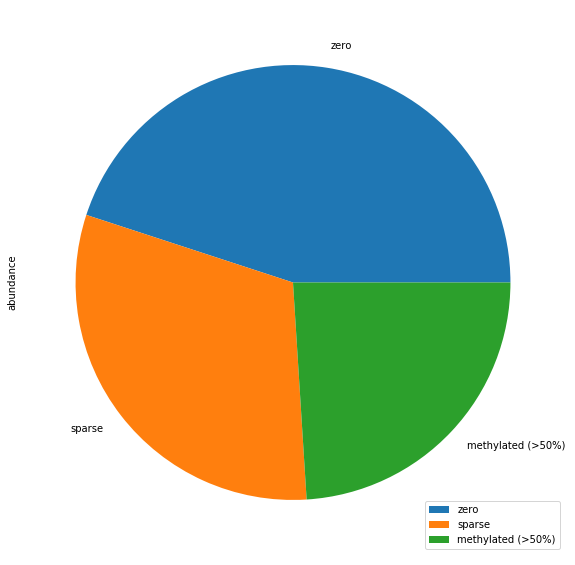

In [28]:
df = pd.DataFrame({'abundance': [6124175, 4225670 , 3268495],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['zero', 'sparse', 'methylated (>50%)'])
plot = df.plot.pie(y='abundance', figsize=(10, 10))

## Creating Beds of different mCpG bgraphs

In [30]:
!awk '{print $1"\t"$2"\t"$3}' analyses/Pg_val_destrand.5x.50p.bedgraph \
> analyses/Pg_val_destrand.5x.50p.bed

In [31]:
!head analyses/Pg_val_destrand.5x.50p.bed

PGA_scaffold1__77_contigs__length_89643857	11797	11798
PGA_scaffold1__77_contigs__length_89643857	11838	11839
PGA_scaffold1__77_contigs__length_89643857	11843	11844
PGA_scaffold1__77_contigs__length_89643857	11846	11847
PGA_scaffold1__77_contigs__length_89643857	11851	11852
PGA_scaffold1__77_contigs__length_89643857	12029	12030
PGA_scaffold1__77_contigs__length_89643857	51414	51415
PGA_scaffold1__77_contigs__length_89643857	51426	51427
PGA_scaffold1__77_contigs__length_89643857	51470	51471
PGA_scaffold1__77_contigs__length_89643857	51563	51564


In [32]:
!awk '{print $1"\t"$2"\t"$3}' analyses/Pg_val_destrand.5x.sparse.bedgraph \
> analyses/Pg_val_destrand.5x.sparse.bed

In [33]:
!awk '{print $1"\t"$2"\t"$3}' analyses/Pg_val_destrand.5x.zero.bedgraph \
> analyses/Pg_val_destrand.5x.zero.bed

In [34]:
!/Applications/bioinfo/bedtools2/bin/complementBed


Tool:    bedtools complement (aka complementBed)
Version: v2.27.1
Summary: Returns the base pair complement of a feature file.

Usage:   bedtools complement [OPTIONS] -i <bed/gff/vcf> -g <genome>

Notes: 
	(1)  The genome file should tab delimited and structured as follows:
	     <chromName><TAB><chromSize>

	For example, Human (hg19):
	chr1	249250621
	chr2	243199373
	...
	chr18_gl000207_random	4262

Tips: 
	One can use the UCSC Genome Browser's MySQL database to extract
	chromosome sizes. For example, H. sapiens:

	mysql --user=genome --host=genome-mysql.cse.ucsc.edu -A -e \
	"select chrom, size from hg19.chromInfo"  > hg19.genome




***** ERROR: no -g genome file provided. *****
